# Handwritten Image Detection with Keras using MNIST data

We will load the data then build a network and train it. Finally we will try different models

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Deep learning framework
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
# Numerical computation
import numpy as np
# For plotting images and graphs
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Load the data and split it to train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Checking shape for one of the images
x_train[0].shape

(28, 28)

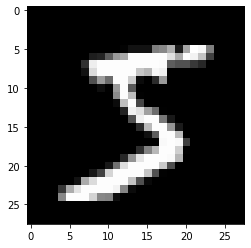

In [4]:
# Looking at actual data in image form
plt.imshow(x_train[0], cmap='gray')

In [5]:
# The actual label for the above image
y_train[0]

5

In [6]:
# Lets check the shape for our images
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [7]:
# To feed MNIST instances into a neural network, they need to be reshaped, from a 2 dimensional image representation to a single dimension sequence
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

In [8]:
# Casting to floats
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [9]:
# Converting target to binary class matrix
classes = 10
y_train = keras.utils.to_categorical(y_train, classes)
y_test = keras.utils.to_categorical(y_test, classes)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
# Lets start with a simple model with 1 hidden layers
model_1 = Sequential()
model_1.add(Dense(64, activation="relu", input_shape=(784, )))
model_1.add(Dropout(0.3))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(10, activation='softmax'))
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=learning_rate), metrics=['accuracy'])

In [13]:
# And now let's fit.
history = model_1.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.6078 - accuracy: 0.8137 - val_loss: 0.2225 - val_accuracy: 0.9354
Epoch 2/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.3108 - accuracy: 0.9093 - val_loss: 0.1729 - val_accuracy: 0.9468
Epoch 3/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.2613 - accuracy: 0.9240 - val_loss: 0.1427 - val_accuracy: 0.9556
Epoch 4/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.2317 - accuracy: 0.9333 - val_loss: 0.1382 - val_accuracy: 0.9561
Epoch 5/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.2105 - accuracy: 0.9399 - val_loss: 0.1267 - val_accuracy: 0.9633
Epoch 6/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.1975 - accuracy: 0.9434 - val_loss: 0.1276 - val_accuracy: 0.9625
Epoch 7/10
60000/60000 [==============================] - 2s 39us/s

In [14]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11255417478312739
Test accuracy: 0.9695000052452087


In [15]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-d', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-d', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-d', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-d', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

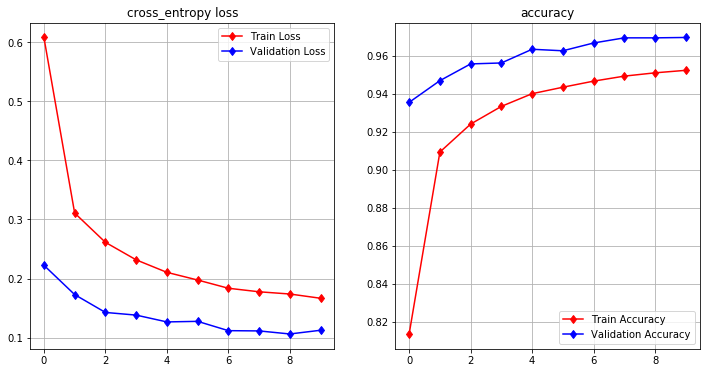

In [16]:
plot_loss_accuracy(history)

## Exercise
### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Three hidden layers.
2. Layers
 - First 300
 - Second 200
 - Third 100
3. Dropout of .4 at each layer
4. How many parameters does your model have?
4. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128


